In [83]:
from helpers import *
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import datetime

In [ ]:
#get data from the postgres table 
PodioData = GetData('''SELECT * FROM dev."podio_data";''')
PodioData.loc[:,'created_on'] =   pd.to_datetime( PodioData.loc[:,'created_on']);


In [191]:
def getUniqueAppName(df):
    return df['appName'].unique()

def getDataBasedOnOption(opt,df):
    filtered = df[df.appName == opt ]
    recentItems  = filtered[filtered['created_on'] >= datetime.datetime.now() - pd.to_timedelta("35day")]
    recentItemsGroupd = recentItems.groupby(['activityType',pd.Grouper(key='created_on', freq='W-MON')]).size()
    recentItemsGroupd = recentItemsGroupd.reset_index().pivot(index=['activityType'], columns='created_on', values=0)
    recentItemsGroupd =   recentItemsGroupd.fillna(0)
    recentItemsGroupd =  recentItemsGroupd[recentItemsGroupd.columns].astype(int)
    return recentItemsGroupd


def getAllByOption(opt,df):
    filtered = df[df.appName == opt ] 
    groupedByActivityType =  filtered.groupby('activityType')[['activityType']].size() #we require this to put it in a table.  
    groupedByActivityType = groupedByActivityType.reset_index()
    groupedByActivityType.columns = ['Activity Type','Total']
    return groupedByActivityType

def makeBarPlot( opt , df ):
    filtered = df[df.appName == opt ]
    pTable = pd.pivot_table(filtered, index=['created_on'], columns=["activityType"], aggfunc=len, fill_value=0)
    return pTable['Name']

def getCorrelationMatrix( opt , df):
    recentItemsGroupd = getDataBasedOnOption(opt , df)
    corrT = recentItemsGroupd.T
    corrResults = corrT.corr()
    fig, ax = plt.subplots()
    sns.heatmap(corrResults, ax=ax)
    return fig 
    
    
    


In [212]:
#Correlation table
#corr = getDataBasedOnOption( opt= 'Contacts' , df = PodioData)
#corrT =  corr.T
corrT.corr()

activityType,comments,incoming_mail,item_revision,outgoing_mail,task
activityType,,,,,
comments,1.000000,0.721688,-0.329690,0.405577,-0.559017
incoming_mail,0.721688,1.000000,-0.190347,0.900052,-0.322749
item_revision,-0.329690,-0.190347,1.000000,0.141236,-0.516047
outgoing_mail,0.405577,0.900052,0.141236,1.000000,-0.334419
task,-0.559017,-0.322749,-0.516047,-0.334419,1.000000


<AxesSubplot: xlabel='activityType', ylabel='activityType'>

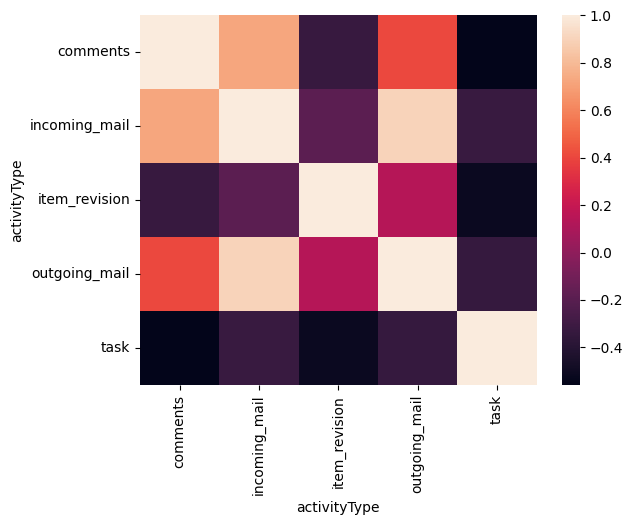

In [215]:
import seaborn as sns
import matplotlib.pyplot as plt
#    fig, ax = plt.subplots(figsize=(2, 1))
fig, ax = plt.subplots()
sns.heatmap(corrT.corr(), ax=ax)
#st.write(fig) 

In [190]:
#barChart

PivotedDf  = makeBarPlot( opt = 'Contacts' , df = PodioData )
PivotedDf

activityType,comments,creation,incoming_mail,item,item_revision,outgoing_mail,rating,task
created_on,,,,,,,,
2022-05-16,0,4,0,0,0,0,0,0
2022-05-17,0,130,0,0,0,0,0,0
2022-05-30,0,1,0,0,0,0,0,0
2022-06-05,1,24,0,0,0,0,0,0
2022-06-07,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
2022-10-21,0,0,0,0,2,0,0,0
2022-11-01,1,0,0,0,2,0,0,0
2022-11-02,1,0,0,0,0,0,0,0


In [168]:
# this is to get a consolidated sum of all activities 
getAllByOption( 'Contacts' , PodioData )

,Activity Type,Total
0,comments,106
1,creation,329
2,incoming_mail,24
3,item,12
4,item_revision,346
5,outgoing_mail,589
6,rating,1
7,task,95


In [216]:
uniqueAppNames =  getUniqueAppName(PodioData)
uniqueAppNames

array(['Contacts', 'Organisations', 'Survey Template/Test', 'Outbox',
       'CPF Dealflow', 'Deals', 'Taxonomy', 'Campaigns', 'Queue'],
      dtype=object)

In [244]:
#start = datetime.datetime.now() - pd.to_timedelta("35day")
start.date()

datetime.date(2022, 10, 7)

In [250]:
new_list  = [ start ]
new_list.extend( data.columns[:-1] )
new_list

[datetime.datetime(2022, 10, 7, 12, 12, 41, 901609),
 Timestamp('2022-10-10 00:00:00'),
 Timestamp('2022-10-17 00:00:00'),
 Timestamp('2022-10-24 00:00:00'),
 Timestamp('2022-11-07 00:00:00')]

In [240]:
#data = getDataBasedOnOption( opt='Contacts' , df = PodioData )
#new_col_list = 
# start = datetime.datetime.now() - pd.to_timedelta("35day")
# new_list  = [ start ]
# new_list.extend( data.columns[:-1] )
for e1,e2 in zip( new_list , data.columns ) :
    print( f"{e1.day}/{e1.month} to {e2.day}/{e2.month}  ")

10/10
17/10
24/10
7/11
14/11


In [114]:
optionFiltered = getDataBasedOnOption( 'Contacts' , PodioData )
#optionFiltered = optionFiltered.reset_index().pivot(index=['activity_type'], columns='created_on', values='0')
optionFiltered.reset_index().pivot(index=['activityType'], columns='created_on', values=0).fillna('-')
#optionFiltered.reset_index().columns

created_on,2022-10-09,2022-10-16,2022-10-23,2022-11-06,2022-11-13
activityType,,,,,
comments,-,2.0,-,2.0,1.0
incoming_mail,-,4.0,-,1.0,-
item_revision,1.0,2.0,5.0,2.0,2.0
outgoing_mail,-,91.0,27.0,-,-
task,61.0,34.0,-,-,-


In [112]:
#testing = getDataBasedOnOption( 'Contacts' , PodioData )
testing[testing.created_on > "2022-11-06" ]
#pd.to_timedelta("4day")

,Name,appName,last_update_on,activityType,created_on,created_by
1895,Martyn,Contacts,2022-11-08 03:44:30,item_revision,2022-11-08,Caroline Pearce
1896,Martyn,Contacts,2022-11-08 03:44:30,comments,2022-11-08,Caroline Pearce
1897,Alex,Contacts,2022-11-08 02:11:08,item_revision,2022-11-08,Brad Moult


## Understanding whats happening before 

In [193]:
import pandas as pd
import datetime
import numpy as np

#data is imported from PODIO ETL #this should query the DB
#dire='G:\\My Drive\\Podio Reports\\Data\\'
#importing the datatable
activity=pd.read_excel('app_activities_dataset.xlsx', 'Sheet1')
activity['created_on']= pd.to_datetime(activity['created_on'])
activity['created_on'] = activity['created_on'].dt.date
#cleaning #I'm filtering out the last closing probability because is a number
len(activity)
activity=activity[activity.activity_type!='last_closing_prob']
activity.head()
activity.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2944 entries, 0 to 2950
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   created_on       2944 non-null   object
 1   created_by.name  2944 non-null   object
 2   link             2944 non-null   object
 3   app              2944 non-null   object
 4   message          2944 non-null   object
 5   activity_type    2944 non-null   object
 6   number           2944 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 184.0+ KB


In [194]:
activity

,created_on,created_by.name,link,app,message,activity_type,number
0,2022-10-12,Russ Banks,https://podio.com/icmecorg/crm/apps/contacts/i...,Contacts,Created this,create_contact,1
1,2022-10-07,Julie Perrissel,https://podio.com/icmecorg/crm/apps/contacts/i...,Contacts,Created this,create_contact,1
2,2022-10-07,Julie Perrissel,https://podio.com/icmecorg/crm/apps/contacts/i...,Contacts,Created this,create_contact,1
3,2022-10-07,Julie Perrissel,https://podio.com/icmecorg/crm/apps/contacts/i...,Contacts,Created this,create_contact,1
4,2022-10-07,Julie Perrissel,https://podio.com/icmecorg/crm/apps/contacts/i...,Contacts,Created this,create_contact,1
...,...,...,...,...,...,...,...
2946,2022-08-26,Nicolas Izcovich,https://podio.com/icmecorg/crm/apps/deals/item...,Deals,"Had a meeting Friday (12/08) with Larry, Chris...",deal_comment,1
2947,2022-08-25,Nicolas Izcovich,https://podio.com/icmecorg/crm/apps/deals/item...,Deals,Meeting with Sam:\n26/07/2022\n\nFivecast is p...,deal_comment,1
2948,2022-08-25,Nicolas Izcovich,https://podio.com/icmecorg/crm/apps/deals/item...,Deals,Proposal modifications sent back to them.,deal_comment,1
2949,2022-08-30,Nicolas Izcovich,https://podio.com/icmecorg/crm/apps/deals/item...,Deals,"Had a meeting today with Sam P., he did not se...",deal_comment,1


In [195]:
activity['created_on']= pd.to_datetime(activity['created_on'])
grouped_df = activity.groupby(['activity_type','app', pd.Grouper(key='created_on', freq='W-MON')])['number'].count().reset_index().sort_values('created_on')

In [60]:
activity

,created_on,created_by.name,link,app,message,activity_type,number
0,2022-10-12,Russ Banks,https://podio.com/icmecorg/crm/apps/contacts/i...,Contacts,Created this,create_contact,1
1,2022-10-07,Julie Perrissel,https://podio.com/icmecorg/crm/apps/contacts/i...,Contacts,Created this,create_contact,1
2,2022-10-07,Julie Perrissel,https://podio.com/icmecorg/crm/apps/contacts/i...,Contacts,Created this,create_contact,1
3,2022-10-07,Julie Perrissel,https://podio.com/icmecorg/crm/apps/contacts/i...,Contacts,Created this,create_contact,1
4,2022-10-07,Julie Perrissel,https://podio.com/icmecorg/crm/apps/contacts/i...,Contacts,Created this,create_contact,1
...,...,...,...,...,...,...,...
2946,2022-08-26,Nicolas Izcovich,https://podio.com/icmecorg/crm/apps/deals/item...,Deals,"Had a meeting Friday (12/08) with Larry, Chris...",deal_comment,1
2947,2022-08-25,Nicolas Izcovich,https://podio.com/icmecorg/crm/apps/deals/item...,Deals,Meeting with Sam:\n26/07/2022\n\nFivecast is p...,deal_comment,1
2948,2022-08-25,Nicolas Izcovich,https://podio.com/icmecorg/crm/apps/deals/item...,Deals,Proposal modifications sent back to them.,deal_comment,1
2949,2022-08-30,Nicolas Izcovich,https://podio.com/icmecorg/crm/apps/deals/item...,Deals,"Had a meeting today with Sam P., he did not se...",deal_comment,1


In [59]:
grouped_df

,activity_type,app,created_on,number
45,email_traceability,Contacts,2022-05-23,330
20,create_contact,Contacts,2022-05-23,330
0,contacts_comment,Contacts,2022-06-06,2
46,email_traceability,Contacts,2022-06-06,56
21,create_contact,Contacts,2022-06-06,56
...,...,...,...,...
62,email_traceability,Contacts,2022-10-10,18
37,create_contact,Contacts,2022-10-10,18
63,email_traceability,Contacts,2022-10-17,2
38,create_contact,Contacts,2022-10-17,2


In [196]:

#creating the pivot table for the weekly view
activity['created_on']= pd.to_datetime(activity['created_on'])
grouped_df = activity.groupby(['activity_type','app', pd.Grouper(key='created_on', freq='W-MON')])['number'].count().reset_index().sort_values('created_on')
grouped_df_filtered=grouped_df[grouped_df['created_on'] >= datetime.datetime.now() - pd.to_timedelta("35day")]
grouped_df_filtered['created_on']=grouped_df_filtered['created_on'].dt.date
final_table=grouped_df_filtered.pivot(index=['app','activity_type'], columns='created_on', values='number')
final_table=final_table.reset_index()
final_table.columns = final_table.columns.astype(str)

/var/folders/wh/mbw6pdx52ps1ky1bbmn8tgqr0000gn/T/ipykernel_42512/291623460.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df_filtered['created_on']=grouped_df_filtered['created_on'].dt.date


In [ ]:
corr_table=corr_table.drop('app', axis=1)
corr_table=corr_table.fillna(0)
corr_table=corr_table.T
#corr_table=corr_table.astype(int)
new_header = corr_table.iloc[0]
corr_table = corr_table[1:] #take the data less the header row
corr_table.columns = new_header
corr_table=corr_table.astype(int)
corr_table_res=corr_table.corr()
import seaborn as sns
import matplotlib.pyplot as plt
#    fig, ax = plt.subplots(figsize=(2, 1))
fig, ax = plt.subplots()
sns.heatmap(corr_table_res, ax=ax)
st.write(fig) 

In [208]:
new_header = corr_table.iloc[0]

In [210]:
#corr_table=final_table.drop('app', axis=1)
#corr_table = corr_table.T
corr_table[1:]

,0,1,2
created_on,,,
2022-10-10,14,18,18
2022-10-17,10,2,2
